In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image

Input Analysis

What are the length distributions of documents and sentences? Any outliers?

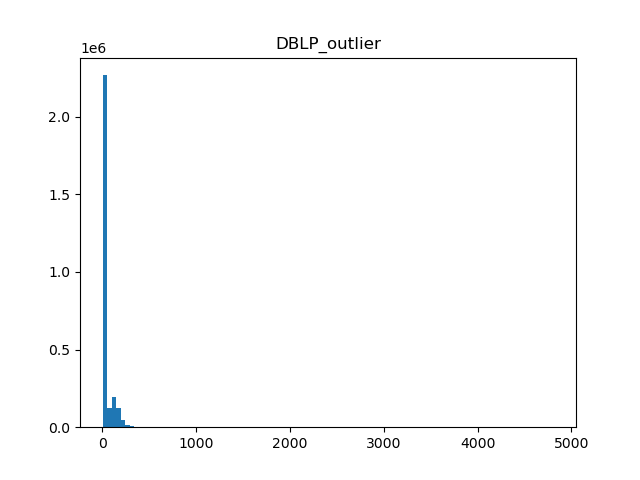

In [2]:
Image("../data/eda/outlier.png")

Boxplot Visual would give a better view of the length of documents.

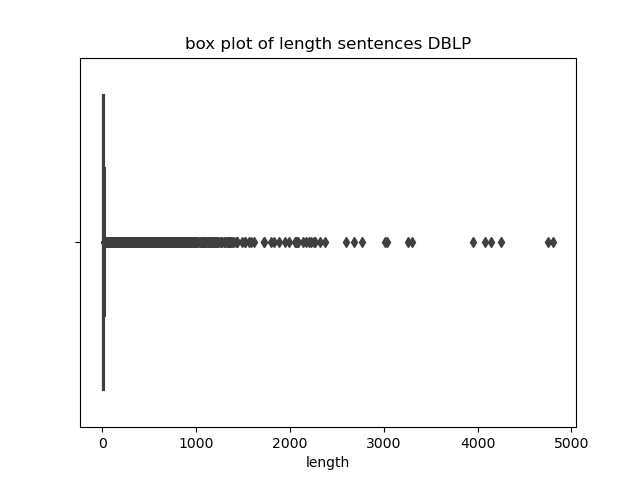

In [3]:
Image("../data/eda/boxplot.png")

After removing the outliers..

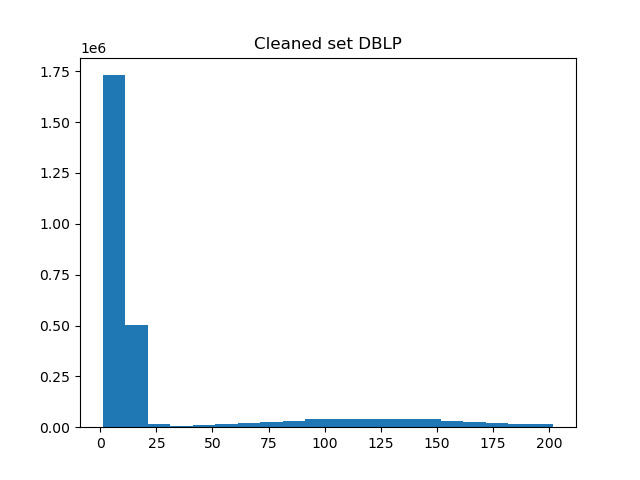

In [4]:
Image("../data/eda/cleaned_set.png")

What is the distribution of all tokens? How many "rare" tokens (e.g., < 5 times)?

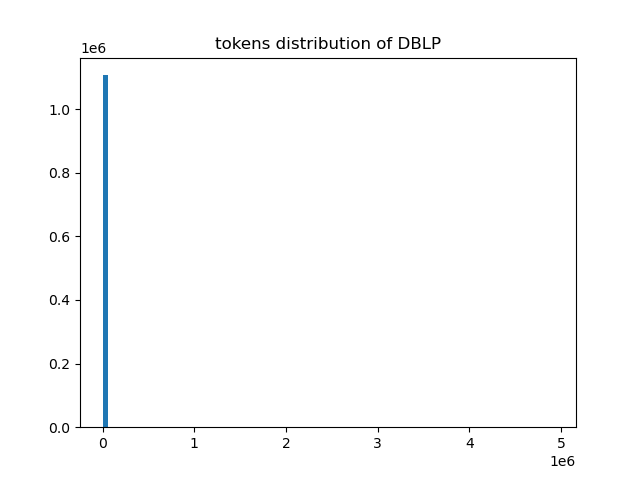

In [5]:
Image("../data/eda/tokens_distribution.png")

In [6]:
f = open("../data/eda/description.txt", "r")
print(f.read())

Mean for length distribution of DBLP.5K is 9.045236188951161. Standard deviation is 12.906825382940804. Number of Rare tokens is 5912.Mean for length distribution of DBLP.5K is 9.045236188951161. Standard deviation is 12.906825382940804. Number of Rare tokens is 5966.Mean for length distribution of DBLP.5K is 9.045236188951161. Standard deviation is 12.906825382940804. Number of Rare tokens is 5966.Mean for length distribution of DBLP.5K is 9.045236188951161. Standard deviation is 12.906825382940804. Number of Rare tokens is 5966.Mean for length distribution of DBLP.5K is 9.045236188951161. Standard deviation is 12.906825382940804. Number of Rare tokens is 5966.


Output Analysis

Run AutoPhrase, and then plot the quality score distribution of single-word and multi-word phrases separately.

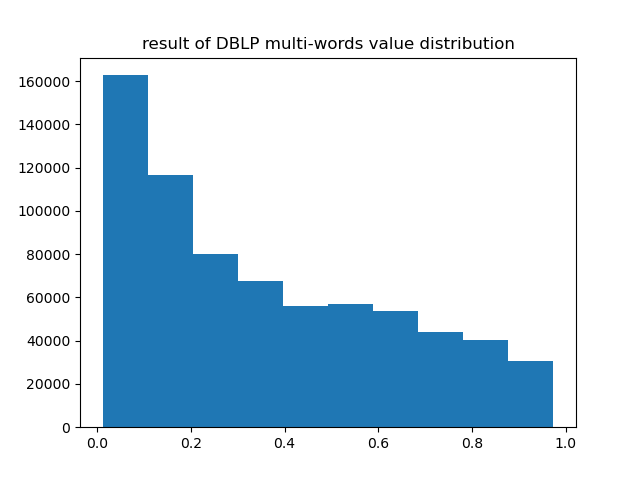

In [7]:
Image("../data/outputs/multi_value_distribution.png")

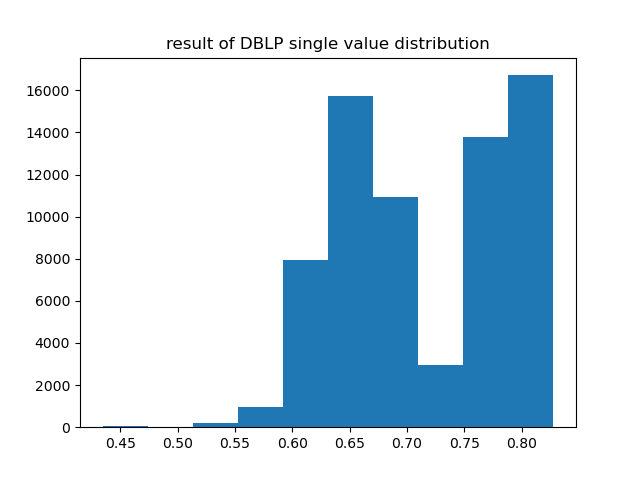

In [8]:
Image("../data/outputs/single_value_distribution.png")

Obviously single word generally has a higher quality score.

In [9]:
df = pd.read_csv('../data/outputs/AutoPhrase_multi-words.txt',sep='\t',header=None)
df.columns = ['Score','Words']

In [10]:
subset = df[df['Score']>0.5].sample(100,replace=True)

In [11]:
subset.sort_values('Score',ascending=False,inplace=True)

Mannually label all high quality phrase with 1 and 0 otherwise. For the purpose of this assignment we use random labels

In [12]:
subset['label'] = np.random.choice([0,1],100)

In [13]:
subset

,Score,Words,label
345,0.962553,josephson junctions,0
2007,0.953893,chennai india,0
8384,0.934586,interlimb coordination,1
9029,0.932669,division multiplexing,1
11521,0.925982,food safety,0
...,...,...,...
206696,0.525405,document authors,0
206833,0.525172,ensure reliable,0
213959,0.512998,process improvement experiment,0
216790,0.508040,gp classification,1


Text(0.5, 1.0, 'precision-recall curve')

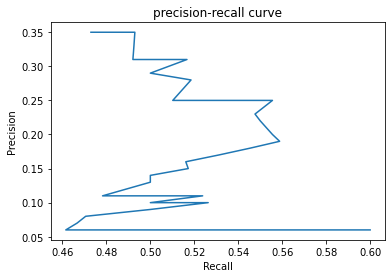

In [14]:
recalls =[]
precisions =[]
for i in np.arange(0.6,0.9,0.01):
    subset['Predicted'] = subset['Score'].apply(lambda x:1 if x>i else 0)
    TP = len(subset[(subset['label']==1)&subset['Predicted']==1])
    TN = len(subset[(subset['label']==0)&subset['Predicted']==0])
    FP = len(subset[(subset['label']==0)&subset['Predicted']==1])
    FN = len(subset[(subset['label']==1)&subset['Predicted']==0])
    recalls.append(TP/(TP+FP))
    precisions.append(TP/(TP+FN))
plt.plot(recalls,precisions)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('precision-recall curve')

In [15]:
f = open("../data/outputs/segmentation.txt", "r")

In [34]:
import re
re.findall('<phrase>',f.read())

[]

Try to run the word2vec code on the phrasal segmentation results to obtain phrase embedding. 

In [26]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
from gensim.models import Phrases
# Train a bigram detector.
bigram_transformer = Phrases(common_texts)
# Apply the trained MWE detector to a corpus, using the result to train a Word2vec model.
model = Word2Vec(bigram_transformer[common_texts], min_count=1)

In [27]:
model = Word2Vec.load("word2vec.model")
model.train([f.read().split(' ')], total_examples=1, epochs=1)

(0, 1)

In [28]:
vector = model.wv['computer'] 

In [29]:
vector

array([ 2.9466122e-03, -3.2004095e-03,  2.0530438e-03, -2.7482258e-03,
       -4.0044910e-03,  4.6724910e-03,  4.9337554e-03,  3.9000299e-03,
       -2.4048981e-04, -2.2894128e-04, -4.9189669e-03,  2.6342238e-03,
       -2.6151428e-03,  1.1178826e-04,  1.4450127e-04, -4.2579439e-03,
        1.9261349e-03,  1.3113369e-05,  2.5621059e-03,  1.7379411e-03,
        4.9521570e-04,  2.7697331e-03, -3.4097109e-03, -2.9273295e-05,
        3.3754411e-03,  2.9711612e-03, -6.1755156e-04, -3.5572760e-03,
        4.1801641e-03, -4.0055891e-03, -3.6943010e-03, -1.4790085e-03,
       -4.3728831e-03, -4.8691169e-03,  6.7710178e-04,  1.1173881e-03,
       -4.0083099e-03,  1.2532331e-03, -2.9165971e-03, -3.2006775e-03,
       -2.8194494e-03,  1.7699997e-03,  3.2104938e-03, -4.9564303e-03,
       -3.1299535e-03,  2.4167877e-03, -2.4326749e-03,  3.2106594e-03,
        1.0653357e-03, -6.3496875e-04, -1.7926038e-03, -4.1918475e-03,
        4.4411845e-03, -3.7126138e-03, -3.6073772e-03, -3.9468934e-03,
      

In [32]:
for i in list(map(lambda x:x.replace(' ','_'),subset[subset['label']==1].sample(3)['Words'].tolist())):
    vector = model.wv[i]

KeyError: "word 'automated_theorem_prover' not in vocabulary"